### Convolution Neural Network

To start Kears with Theano backend please run the following command while starting jupter notebook.

KERAS_BACKEND=theano jupyter notebook

In [1]:
import keras
keras.backend.backend()
keras.backend.image_dim_ordering()

# Ensure to set the image dimension appropriately
K = keras.backend.backend()
if K=='tensorflow':
    keras.backend.set_image_dim_ordering('tf')
else:
    keras.backend.set_image_dim_ordering('th')

Using TensorFlow backend.


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(2017)

from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.preprocessing import sequence

from keras import backend as K
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot, plot_model

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
img_rows, img_cols = 28, 28
nb_classes = 10

nb_filters = 5 # the number of filters
nb_pool = 2 # window size of pooling
nb_conv = 3 # window or kernel size of filter
nb_epoch = 5
kernel_size = 3 # convolution kernel size

if K.image_dim_ordering() == 'th':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

# data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) 
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Conv2D(nb_filters, kernel_size, input_shape=input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size = nb_pool),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


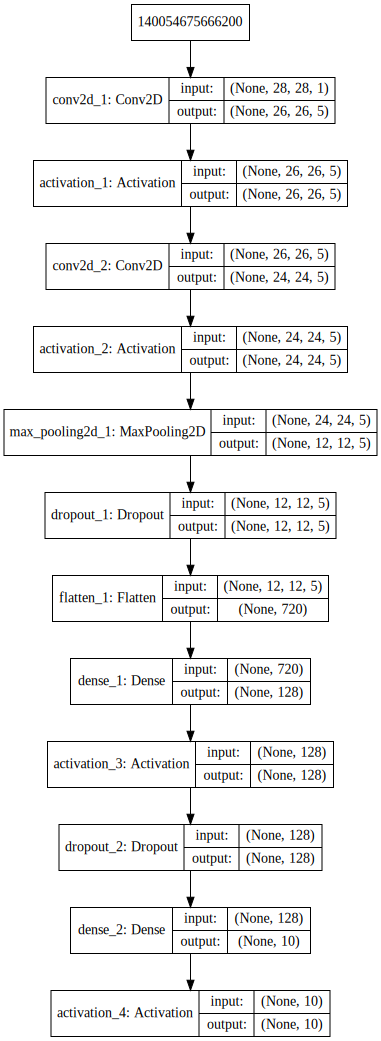

In [5]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 5)         50        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 5)         230       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 5)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 5)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 720)               0         
__________

In [7]:
model.fit(X_train, Y_train, batch_size=256, epochs=nb_epoch, verbose=2,  validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 15s - loss: 0.6098 - acc: 0.8085 - val_loss: 0.1609 - val_acc: 0.9523
Epoch 2/5
 - 15s - loss: 0.2427 - acc: 0.9251 - val_loss: 0.1148 - val_acc: 0.9675
Epoch 3/5
 - 15s - loss: 0.1941 - acc: 0.9410 - val_loss: 0.0950 - val_acc: 0.9727
Epoch 4/5
 - 15s - loss: 0.1670 - acc: 0.9483 - val_loss: 0.0866 - val_acc: 0.9753
Epoch 5/5
 - 15s - loss: 0.1500 - acc: 0.9548 - val_loss: 0.0830 - val_acc: 0.9767


### Visualization of layers

In [8]:
# visualization
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data, cmap=plt.cm.gray_r)
    plt.axis('off')
    
def draw_digit(data, row, col):
    for j in range(row):
        plt.figure(figsize=(8,8))
        for i in range(col):
            plt.subplot(row, col, i+1)
            plt.imshow(data[j,:,:,i], cmap=plt.cm.gray_r)
            plt.axis('off')
        plt.tight_layout()
    plt.show()

### Input layer (original image)

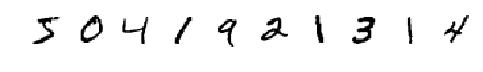

In [9]:
show_size = 10
plt.figure(figsize=(8,8))

for i in range(show_size):
    draw(X_train[i].reshape(28,28), 1, show_size, i+1)
plt.show()

### First layer with 5 filters

first layer shape:  (10, 26, 26, 5)


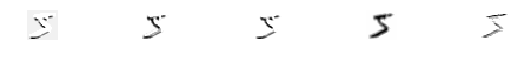

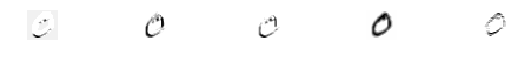

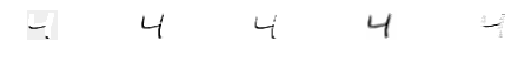

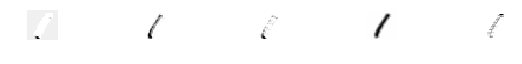

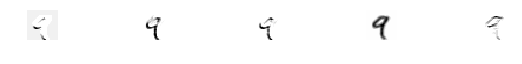

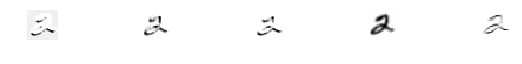

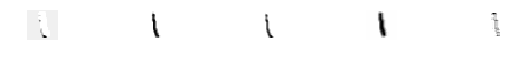

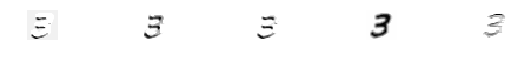

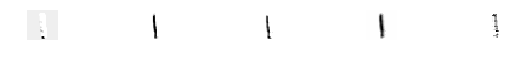

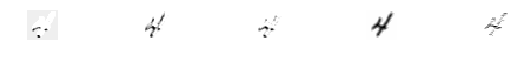

In [10]:
get_first_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]

print ('first layer shape: ', first_layer.shape)
    
draw_digit(first_layer, first_layer.shape[0], first_layer.shape[3])    

### Second layer with 5 filters

second layer shape:  (10, 24, 24, 5)


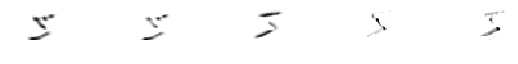

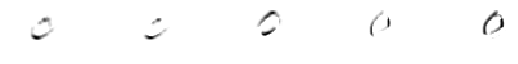

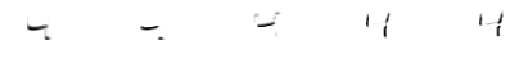

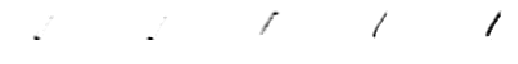

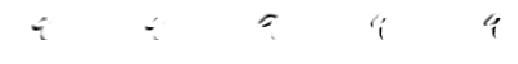

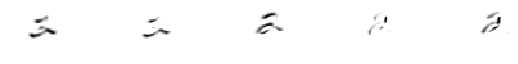

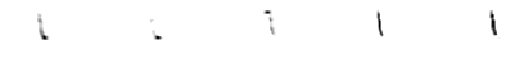

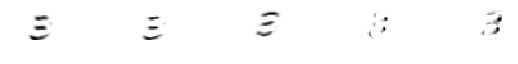

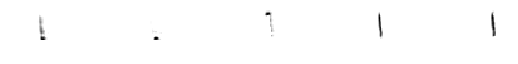

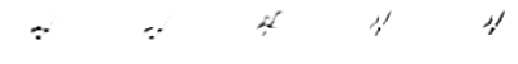

In [11]:
get_second_layer_output = K.function([model.layers[0].input], [model.layers[3].output])
second_layer = get_second_layer_output([X_train[0:show_size]])[0]

print ('second layer shape: ', second_layer.shape)

draw_digit(second_layer, second_layer.shape[0], second_layer.shape[3])

### Third layer with 5 filters

thrid layer shape:  (10, 12, 12, 5)


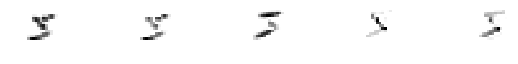

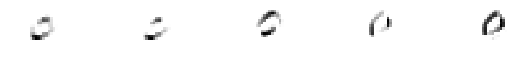

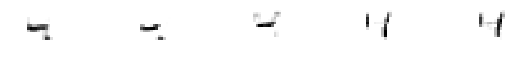

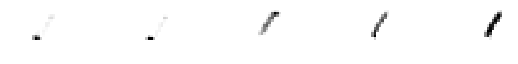

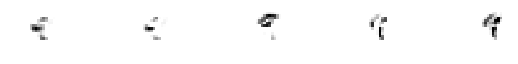

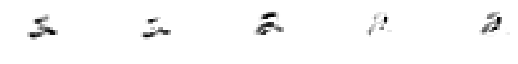

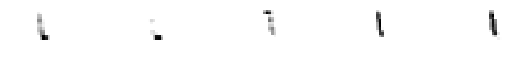

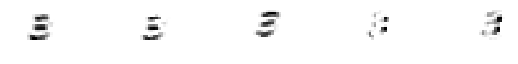

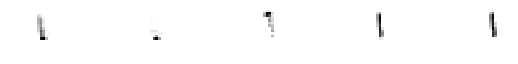

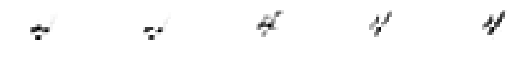

In [12]:
get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[4].output])
third_layers = get_3rd_layer_output([X_train[0:show_size]])[0]

print ('thrid layer shape: ', third_layers.shape)

draw_digit(third_layers, third_layers.shape[0], third_layers.shape[3])